## Import Libraries

In [1]:
# Import Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Customize

In [2]:
# Customize parameters
my_inventory_input="0602 inventory_transaction.csv"
my_features = ['Inventory Level', 'Units Sold', 'Units Ordered',
               'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
my_price_competitor_cluster="0605 Price and Competitor.png"
my_price_cluster="0605 Price_clusters.csv"
my_price_summary="0605 Price_summary.csv"
my_demand_forecast="0605 Demand_Forecast_units_sold.png"
my_demand_cluster="0605 Demand_price_clusters.csv"
my_demand_summary="0605_Demand_summary.csv"
my_kmeans_cluster="0605 Clustering_KMeans_Output.csv"
my_cluster_profit="0605 Clustering_Profitability.png"

#Customize cluster markers. Set it to Set2 for colour. Comment out the one not being used
#my_palette='Set2' 
my_palette=['black', 'gray', 'lightgray']


### Load data and preprocess

In [3]:
# Load Data 
df = pd.read_csv(my_inventory_input)

# Select Relevant Numeric Features adding seasonality
season_encoded = pd.get_dummies(df['Seasonality'], prefix='Season')
features = df[my_features]
features = pd.concat([features, season_encoded], axis=1)

# Normalize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Clustering based on price and competitor prices

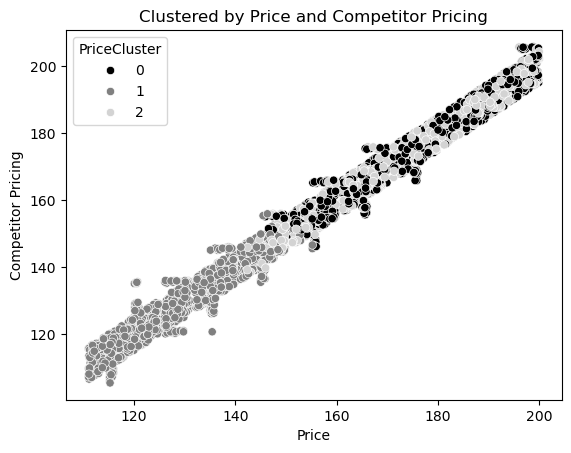

Price Cluster Summary:
              Units Sold   Price  Competitor Pricing  Discount  Count
PriceCluster                                                         
0                 236.68  174.99              175.31     16.82   1242
1                 236.33  129.22              129.03     11.70   1541
2                 238.51  171.36              171.60      2.39    867
Clustering saved as 0605 Price_clusters.csv and 0605 Price_summary.csv


In [4]:
# Clustering price and competitor prices 
features = df[['Price', 'Competitor Pricing', 'Discount']]
scaled_features = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['PriceCluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='Price', y='Competitor Pricing', hue='PriceCluster', data=df, palette=my_palette)
plt.title("Clustered by Price and Competitor Pricing")
plt.savefig(my_price_competitor_cluster)
plt.show()

# Cluster Summary Table
summary1 = df.groupby('PriceCluster')[['Units Sold', 'Price', 'Competitor Pricing', 'Discount']].mean().round(2)
summary1['Count'] = df['PriceCluster'].value_counts().sort_index()

print("Price Cluster Summary:")
print(summary1)

# Save Results 
df.to_csv(my_price_cluster, index=False)
summary1.to_csv(my_price_summary)
print(f"Clustering saved as {my_price_cluster} and {my_price_summary}")

# Cluster 0: High price, low discount, above-market → premium strategy
# Cluster 1: Price = competitor, high discount → competitive & elastic
# Cluster 2: Low price, low discount → potential underpricing or low value-perception

## Clustering based on demand forecast and units sold

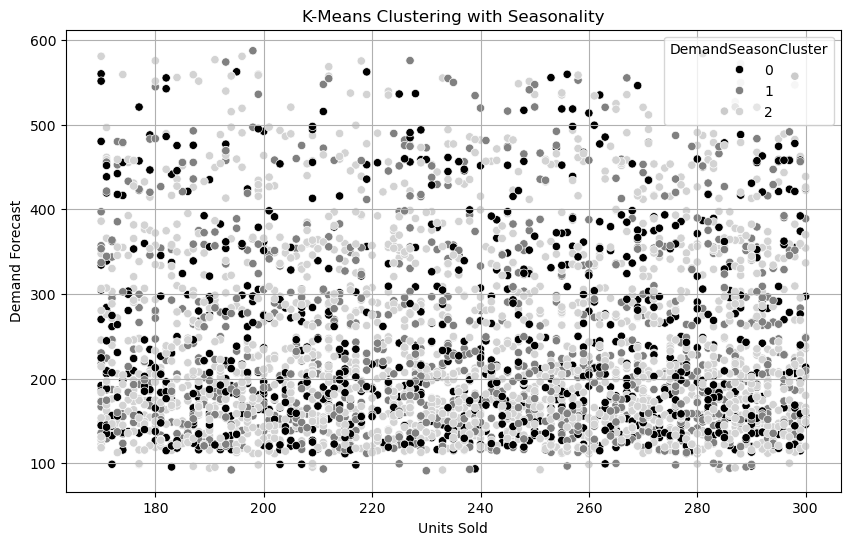

Demand Season Cluster Summary:
                     Units Sold  Inventory Level  Demand Forecast  Discount  \
DemandSeasonCluster                                                           
0                        235.88           335.88           242.03     11.62   
1                        237.82           337.82           242.52     10.91   
2                        237.08           337.08           243.41     11.19   

                     Count  
DemandSeasonCluster         
0                      905  
1                      902  
2                     1843  
Clustering with seasonality saved as 0605 Demand_price_clusters.csv and 0605_Demand_summary.csv.


In [5]:
# Apply KMeans Clustering for demand forecast and units sold
features = df[['Units Sold', 'Demand Forecast']].copy()
features = pd.concat([features, season_encoded], axis=1)
scaled_features = StandardScaler().fit_transform(features)


# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['DemandSeasonCluster'] = kmeans.fit_predict(scaled_features)


# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Units Sold'], y=df['Demand Forecast'], hue=df['DemandSeasonCluster'], palette=my_palette)
plt.title("K-Means Clustering with Seasonality")
plt.xlabel("Units Sold")
plt.ylabel("Demand Forecast")
plt.grid(True)
plt.savefig(my_demand_forecast)
plt.show()

# Cluster Summary Table 
summary = df.groupby('DemandSeasonCluster')[['Units Sold', 'Inventory Level', 'Demand Forecast', 'Discount']].mean().round(2)
summary['Count'] = df['DemandSeasonCluster'].value_counts().sort_index()

print("Demand Season Cluster Summary:")
print(summary)

# Save Results 
df.to_csv(my_demand_cluster, index=False)
summary.to_csv(my_demand_summary)
print(f"Clustering with seasonality saved as {my_demand_cluster} and {my_demand_summary}.")

# Cluster 0: High forecast & sales, low stock → needs urgent restocking
#Cluster 1: High stock, low forecast & sales → risk of overstock
#Cluster 2: Balanced → stable items

## Clustering based on profitability and turnover ratio

K-Means clustering completed and saved to 0605 Clustering_KMeans_Output.csv


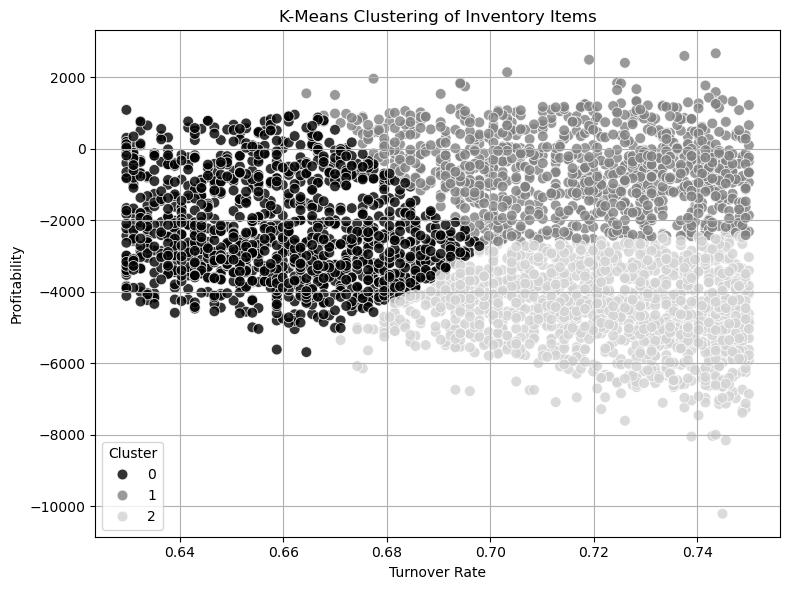

Visualization saved as 0605 Clustering_Profitability.png


In [6]:
# Clustering profitability and turnover rate
# Feature Engineering 
df['Turnover_Rate'] = df['Units Sold'] / df['Inventory Level']
df['Profitability'] = (df['Price'] - df['Competitor Pricing'] - df['Discount']) * df['Units Sold']

# Select Relevant Features 
features1 = df[['Turnover_Rate', 'Profitability']].dropna()

# Normalize Features 
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(features1)

# Apply K-Means Clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
features1['KMeans_Cluster'] = kmeans.fit_predict(scaled_features1)

# Save the Result 
features1.to_csv(my_kmeans_cluster, index=False)
print(f"K-Means clustering completed and saved to {my_kmeans_cluster}")

# === Cluster Visualization ===
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=features1,
    x='Turnover_Rate',
    y='Profitability',
    hue='KMeans_Cluster',
    palette=my_palette,
    s=60,
    alpha=0.8
)
plt.title("K-Means Clustering of Inventory Items")
plt.xlabel("Turnover Rate")
plt.ylabel("Profitability")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig(my_cluster_profit)
plt.show()

print(f"Visualization saved as {my_cluster_profit}")
